#CARDEKHO 


Import Libaray

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



Import DataSet

In [73]:
df=pd.read_csv("Cardekho.csv")
df.head(3)

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.7,796,46.3,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.9,1197,82.0,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.0,1197,80.0,5,215000


In [74]:
df.shape

(15411, 14)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB


In [76]:
df.describe()

,Unnamed: 0,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,9811.857699,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,5643.418542,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4906.500000,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,9872.000000,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,14668.500000,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,19543.000000,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [77]:
df.isnull().sum()

Unnamed: 0           0
car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [78]:
df.duplicated().sum()

np.int64(0)

In [79]:
df.drop_duplicates()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


Data Insight

In [80]:
df["transmission_type"].value_counts()

transmission_type
Manual       12225
Automatic     3186
Name: count, dtype: int64

In [81]:
df["brand"].value_counts()

brand
Maruti           4992
Hyundai          2982
Honda            1485
Mahindra         1011
Toyota            793
Ford              790
Volkswagen        620
Renault           536
BMW               439
Tata              430
Mercedes-Benz     337
Skoda             334
Audi              192
Datsun            170
Jaguar             59
Land Rover         51
Jeep               41
Kia                32
Porsche            21
Volvo              20
MG                 19
Mini               17
Nissan             11
Lexus              10
Isuzu               8
Bentley             3
Maserati            2
ISUZU               2
Ferrari             1
Mercedes-AMG        1
Rolls-Royce         1
Force               1
Name: count, dtype: int64

In [82]:
df["car_name"].value_counts()

car_name
Hyundai i20              906
Maruti Swift Dzire       890
Maruti Swift             781
Maruti Alto              778
Honda City               757
                        ... 
Mercedes-AMG C             1
Rolls-Royce Ghost          1
Maserati Quattroporte      1
Isuzu MUX                  1
Force Gurkha               1
Name: count, Length: 121, dtype: int64

In [83]:
df["fuel_type"].value_counts(normalize=True)*100

fuel_type
Petrol      49.594446
Diesel      48.140938
CNG          1.953150
LPG          0.285510
Electric     0.025955
Name: proportion, dtype: float64

In [84]:
round(float(df["mileage"].mean()),3)

19.701

In [85]:
df["seller_type"].value_counts()

seller_type
Dealer              9539
Individual          5699
Trustmark Dealer     173
Name: count, dtype: int64

#Data Visualization

In [ ]:
sns.pairplot(data=df)
plt.show()

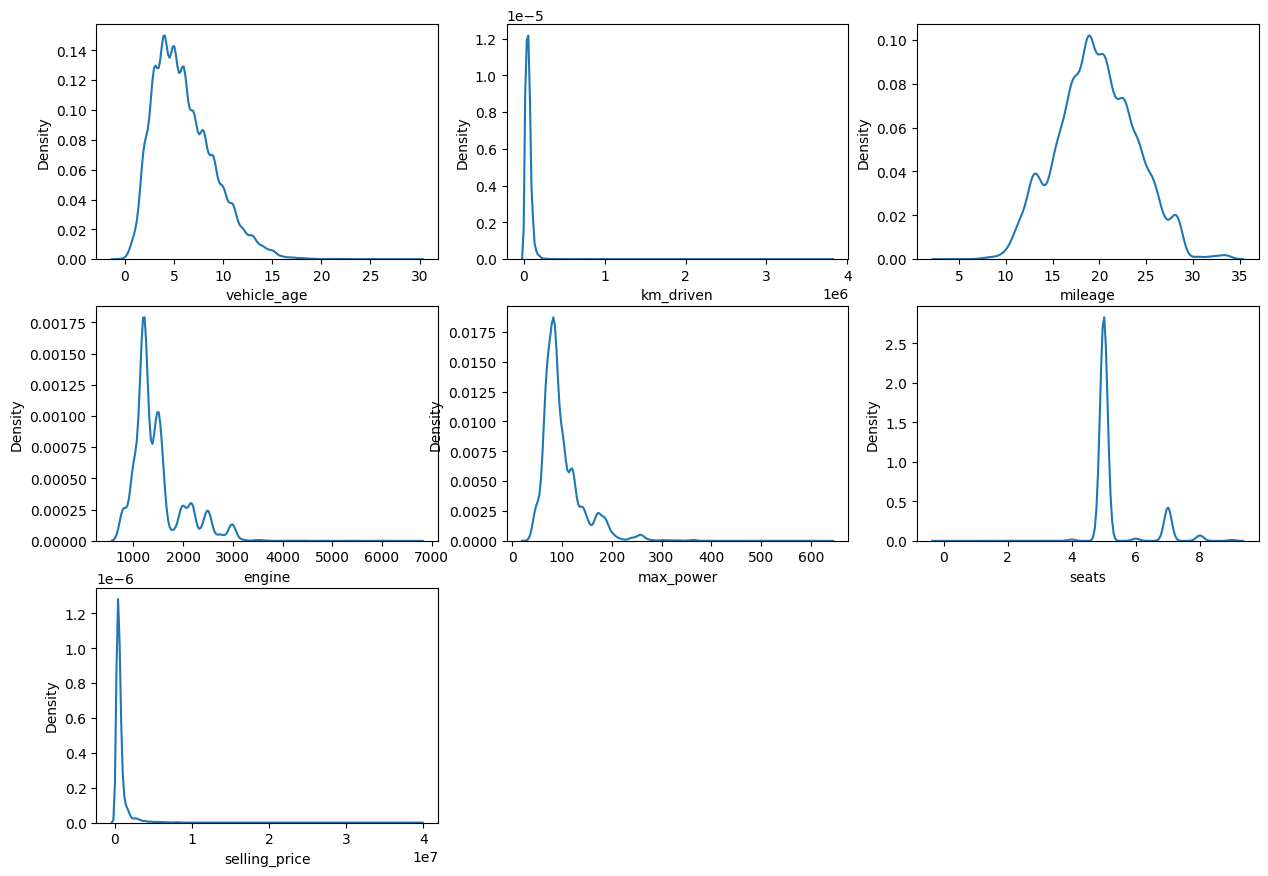

In [53]:
num_col=["vehicle_age","km_driven","mileage","engine","max_power","seats","selling_price"]
plt.figure(figsize=(15,25))
for i in range(len(num_col)):
    plt.subplot(7,3,i+1)
    sns.kdeplot(data=df[num_col[i]])
plt.show()

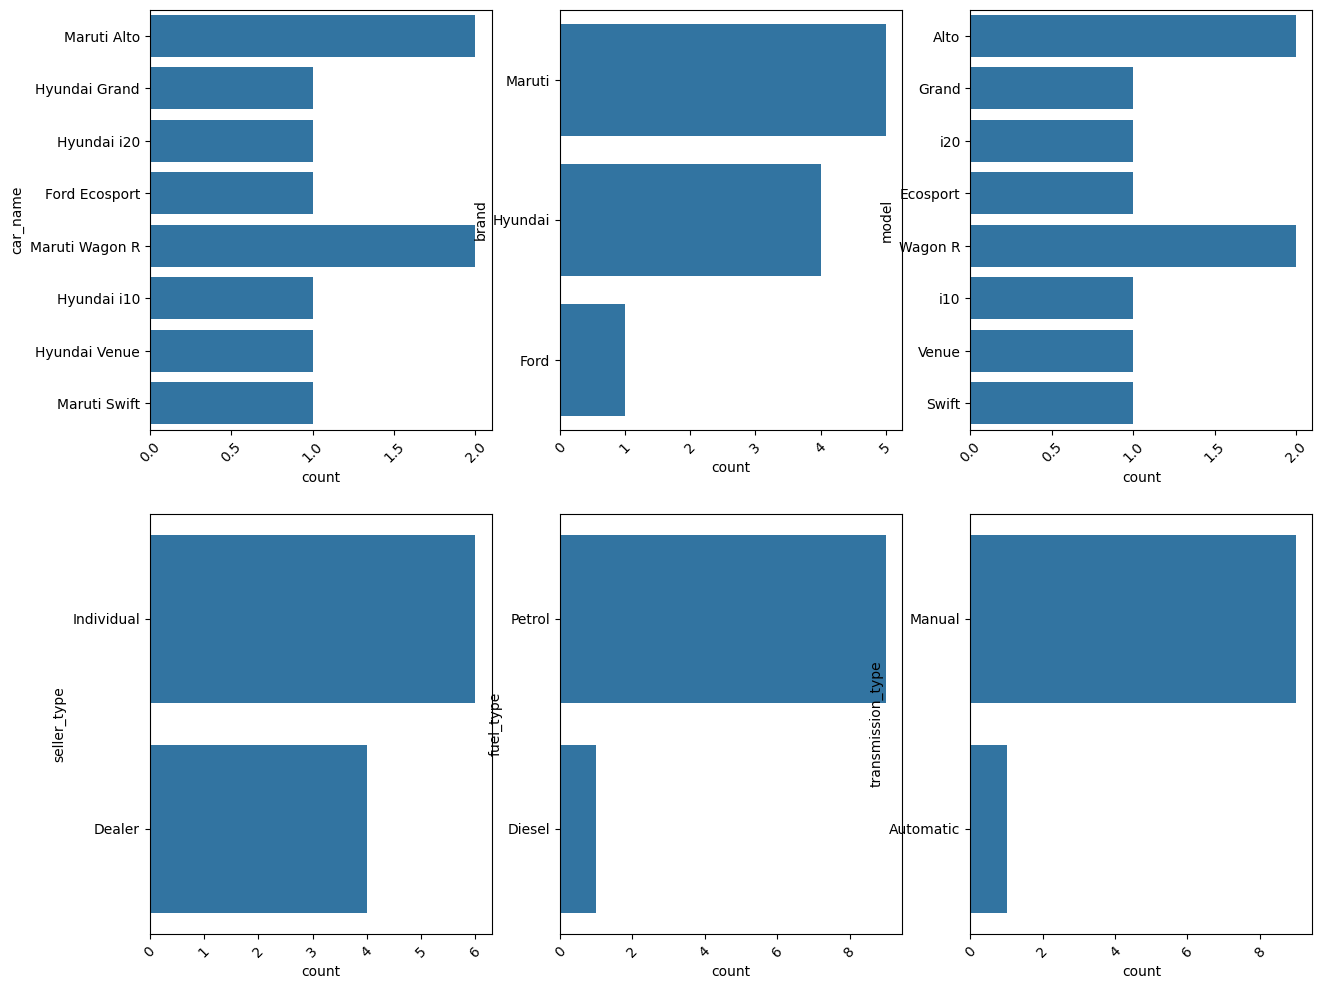

In [54]:
cat_cols=["car_name","brand","model","seller_type","fuel_type","transmission_type"]
plt.figure(figsize=(15,12))
for i in range(len(cat_cols)):
    plt.subplot(2,3,i+1)
    plt.xticks(rotation=45)
    sns.countplot(data=df[cat_cols[i]].head(10))
plt.show()

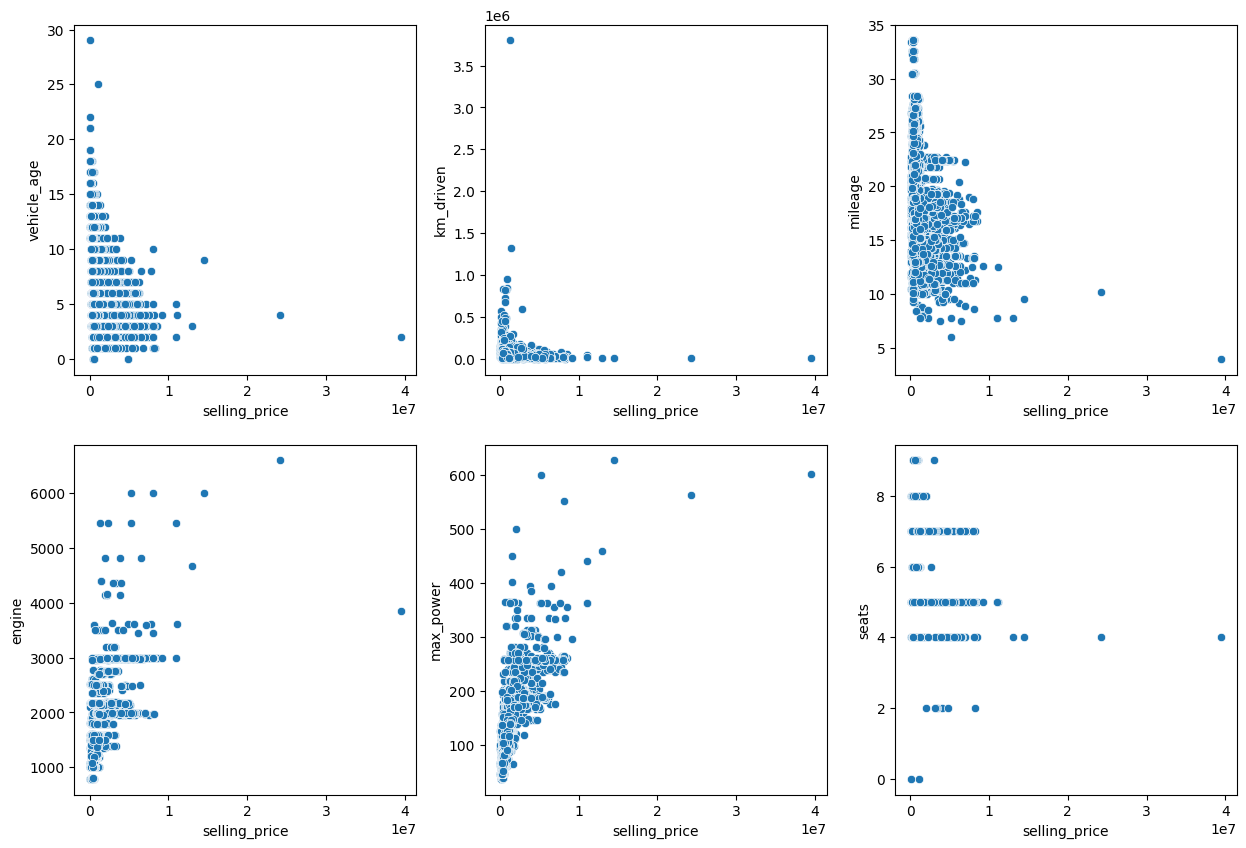

In [55]:
num_cols=["vehicle_age","km_driven","mileage","engine","max_power","seats"]
plt.figure(figsize=(15,10))
for i in range(len(num_cols)):
    plt.subplot(2,3,i+1)
    sns.scatterplot(data=df,x="selling_price",y=num_cols[i])
plt.show()


In [56]:
cor=df[num_cols].corr()


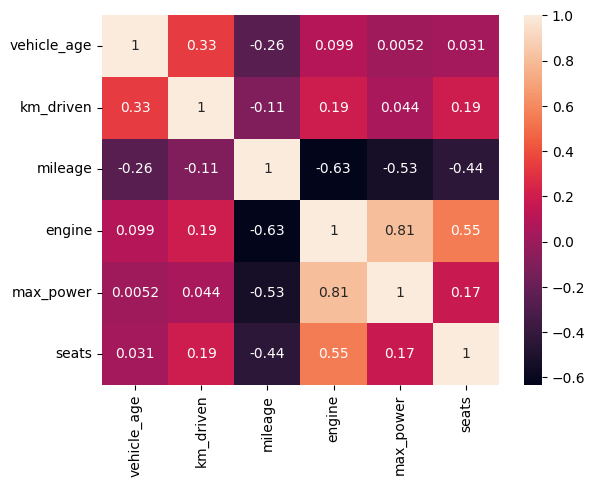

In [57]:
sns.heatmap(data=cor,annot=True)
plt.show()

DataSet Value Replace For Numercial Value & Data Cleaning

In [58]:
df.replace("Individual",1,inplace=True)
df.replace("Dealer",0,inplace=True)
df.replace("Trustmark Dealer",2,inplace=True)


C:\Users\vrooo\AppData\Local\Temp\ipykernel_20128\1686412482.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace("Trustmark Dealer",2,inplace=True)


In [59]:
df.replace("Petrol",0,inplace=True)
df.replace("Diesel",1,inplace=True)
df.replace("CNG",2,inplace=True)
df.replace("LPG",3,inplace=True)
df.replace("Electric",4,inplace=True)


C:\Users\vrooo\AppData\Local\Temp\ipykernel_20128\4134457878.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace("Electric",4,inplace=True)


In [60]:
df.replace("Automatic",1,inplace=True)
df.replace("Manual",0,inplace=True)


C:\Users\vrooo\AppData\Local\Temp\ipykernel_20128\22526943.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace("Manual",0,inplace=True)


In [61]:
df.transmission_type.unique()

array([0, 1])

Traning & Testing Data Set

In [62]:
x=df.drop(columns={"car_name","brand","model",},axis=1)
y=df["selling_price"]

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Using Linear Regression Model

In [64]:
lr=LinearRegression()

In [65]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
lr.fit(x_test,y_test)

LinearRegression()

In [67]:
prediction=lr.predict(x_test)
print(prediction)

[190000. 600000. 665000. ... 790000. 440000. 861000.]


In [68]:
print(y_test)

3334      190000
10928     600000
2518      665000
11322    1570000
9394      160000
          ...   
1943      295000
10471     840000
13098     790000
6545      440000
14377     861000
Name: selling_price, Length: 3083, dtype: int64


Data Accuracy

In [69]:
mse=mean_absolute_error(y_test,prediction)
print(mse)

3.6140245515665874e-10


In [70]:
accuracy_score=lr.score(x_test,y_test)*100
print(accuracy_score)

100.0


Prediction

In [71]:
print(f" This Is Selling Price{prediction}")

 This Is Selling Price[190000. 600000. 665000. ... 790000. 440000. 861000.]
